# Building Model & Evaluation
--------------------------------------------------------

steps of work:
----------------
 1. import dataset.
 2. split to train & test.
 3. model selection
 4. create evaluation pipline.
 5. save the best model.

### import dependencies

In [1]:
# dependencies
import pandas as pd
import matplotlib.pyplot as plt

## 1. import dataset

In [2]:
dataset=pd.read_csv("dataset.csv")
print(dataset.shape)
dataset.head(10)

(14999, 10)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left,salary_low,salary_medium
0,0.38,0.53,2.0,157.0,3.0,0.0,0.0,1.0,1.0,0.0
1,0.80,0.86,5.0,262.0,6.0,0.0,0.0,1.0,0.0,1.0
2,0.11,0.88,7.0,272.0,4.0,0.0,0.0,1.0,0.0,1.0
3,0.72,0.87,5.0,223.0,5.0,0.0,0.0,1.0,1.0,0.0
4,0.37,0.52,2.0,159.0,3.0,0.0,0.0,1.0,1.0,0.0
5,0.40,0.50,2.0,153.0,3.0,0.0,0.0,1.0,1.0,0.0
6,0.10,0.77,6.0,247.0,4.0,0.0,0.0,1.0,1.0,0.0
7,0.92,0.85,5.0,259.0,5.0,0.0,0.0,1.0,1.0,0.0
8,0.89,1.00,5.0,224.0,5.0,0.0,0.0,1.0,1.0,0.0
9,0.42,0.53,2.0,142.0,3.0,0.0,0.0,1.0,1.0,0.0


## 2. split to train & test
we will use simple cross validation technique for splitting our data to train test sub-datasets.

In [3]:
from sklearn.model_selection import train_test_split

X = dataset.drop('left', axis=1)
y = dataset['left']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

print("Xtrain shape:" ,X_train.shape, "ytrain_shape: ", y_train.shape, 
      "\nXtest shape:" ,X_test.shape, "ytest_shape: ", y_test.shape)

Xtrain shape: (11999, 9) ytrain_shape:  (11999,) 
Xtest shape: (3000, 9) ytest_shape:  (3000,)


## 3. model selection

**Define Our Problem**

* the goal:

    predicting rather an employee will mostlikly to leave a company.
* problem type:
    
    The problem is a supervised classification problem.

we will select a bunch of classification algorithms:

    - RandomForest classifier.
    - XGBoost classifier. 
    - Logistic Regression classifier

### 3.1 make pipline dict

In [14]:
from sklearn.pipeline import make_pipeline

# import models.
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import SVC 


In [31]:
piplines = {
    'rf':make_pipeline(RandomForestClassifier(random_state=1234)),
    'xgb':make_pipeline(XGBClassifier(objective='binary:logistic')),
    'ridge':make_pipeline(RidgeClassifier(random_state=1234)),
    'svc':make_pipeline(SVC()),
}

### 3.2 create hyperparameter grid.


In [16]:
RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [17]:
XGBClassifier().get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': None,
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [18]:
RidgeClassifier().get_params()


{'alpha': 1.0,
 'class_weight': None,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': 'deprecated',
 'positive': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}

In [19]:
SVC().get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [34]:
hypergrid = {
    'rf':{
        'randomforestclassifier__n_estimators':[10,50,100,130],
        'randomforestclassifier__criterion':['gini', 'entropy'],
        'randomforestclassifier__max_depth':range(2,4,1),
        'randomforestclassifier__min_samples_split':[2,3,4,5,6],
        'randomforestclassifier__min_samples_leaf':[1,2,3,4,5,6],
        'randomforestclassifier__max_features':['auto', 'log2']
    },
    'xgb':{
        'xgbclassifier__learning_rate':[0.001,0.005,0.01,0.05,0.1,0.5,0.99],
        'xgbclassifier__max_depth':[3,5,10,20],
        'xgbclassifier__n_estimators':[10,50,100,200]
    },
    'ridge':{
        'ridgeclassifier__alpha':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99]
    },
    'svc':{
        'svc__gamma':['scale', 'auto']
    }
}


### 3.3 train models using GridSearch: hyper-parameter tuning

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.exceptions import NotFittedError

In [13]:
fit_models = {}
scores = []
for algo, pipline in piplines.items():
    model = GridSearchCV(pipline, hypergrid[algo], cv=10, n_jobs=-1)
    try:
        print("starting training for {}".format(algo))
        model.fit(X_train, y_train)
        fit_models[algo] = model
        print("{} trained succefully!".format(algo))
        scores.append({
            'model_name': algo,
            'best_score': model.best_score_,
            'best_params': model.best_params_
        })
    except NotFittedError as e:
        print(repr(e))

starting training for rf
rf trained succefully!
starting training for xgb
xgb trained succefully!
starting training for ridge
ridge trained succefully!
starting training for svmc


ValueError: Invalid parameter svmc for estimator Pipeline(steps=[('svc', SVC(random_state=1234))]). Check the list of available parameters with `estimator.get_params().keys()`.

### 3.4 examine training results

In [42]:
df = pd.DataFrame(scores)
df[['model_name','best_score']].sort_values(['best_score'],ascending=False)

,model_name,best_score
1,xgb,0.989916
3,svc,0.952830
0,rf,0.917077
2,ridge,0.777732


as we can see the XGBoosting performed the best to fit our training data.
svc second and so on.

## 4. Evaluation & selection

In [69]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_recall_fscore_support

### 4.1 Run Test dataset on pretrained models.

In [71]:
# predicting and extract confusion matrix, precision, recall & fscore.
results=[]
for algo, model in fit_models.items():
    predictions = model.predict(X_test)
    results.append({
        'algo':algo,
        'yhat':predictions,
        'conf_mat':confusion_matrix(y_test, predictions, labels=model.classes_),
        'prf_weighted':precision_recall_fscore_support(y_test, predictions, average='weighted'),
        'dis_classes':model.classes_
    })

### 4.2 Visualized Confusion Matrix

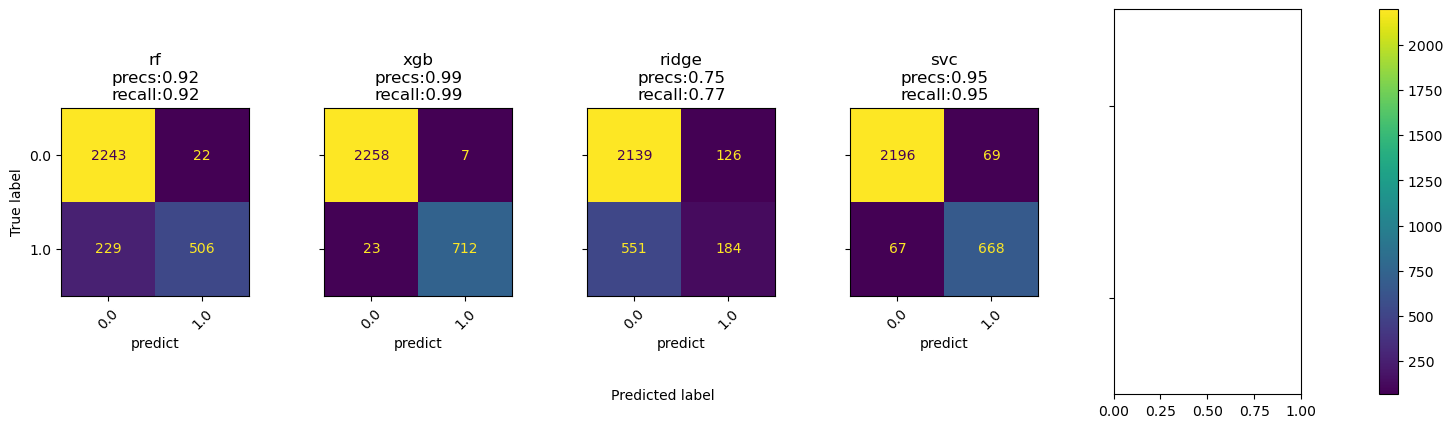

In [73]:
# visualizing the confusion matrix: 
f, axes = plt.subplots(1, 5, figsize=(20, 5), sharey='row')
for i, res in enumerate(results):
    algo, yhat, conf_mat, dis_classes=res['algo'], res['yhat'], res['conf_mat'],res['dis_classes']
    prec, recall, fscore = res['prf_weighted'][0],res['prf_weighted'][1],res['prf_weighted'][2]
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=dis_classes)
    disp.plot(ax=axes[i], xticks_rotation=45)
    disp.ax_.set_title(f"{algo}\nprecs:{round(prec,2)}\nrecall:{round(recall,2)}" )
    
    disp.im_.colorbar.remove()
    disp.ax_.set_xlabel('predict')
    if i!=0:
        disp.ax_.set_ylabel('')


f.text(0.4, 0.1, 'Predicted label', ha='left')
plt.subplots_adjust(wspace=0.40, hspace=0.1)


f.colorbar(disp.im_, ax=axes)
plt.show()

#### Conclusion

***1st place:***
XGBClassifier achived best performance on our train and test datasets. 

**2nd place:**
RandomForestClassifier achived second best performance on our train and test datasets.

## Save Model

In [80]:
import joblib

In [ ]:
# saving the results
pd.DataFrame(results).to_csv("./save_dicts/results_dict.csv")

In [97]:
# saving the models.
for algo, model in fit_models.items():
    joblib.dump(model, f'./save_dicts/{algo}.pkl')